#### Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pandas_datareader as web
import datetime as dt 


#### Extract the data from Yahoo finance

In [4]:
start = dt.datetime(2022,1,1)
end = dt.datetime.now()

eurusd = web.data.DataReader('EURUSD%3DX', 'yahoo', '01.01.2022', end).sort_values(['Date'], ascending= False)

In [5]:
stocks_dict = {'Amazon':'AMZ.DE', 'SiTime Inc.':'SITM', 'Biontech':'22UA.DE', 'Block':'SQ', 'Tesla': 'TL0.DE', 'Datagroup': 'D6H.DE', 'Rational AG': 'RAA.DE', 'Ferrari':'RACE', 'Alphabet': 'GOOG', 'Nestle':'NSRGY', 'LVMH':'MOH.F'}

keys = list(stocks_dict.keys())
values = list(stocks_dict.values())

In [6]:
dfs =[]

for stock in stocks_dict:
    
    stock_data = web.DataReader(stocks_dict[stock], 'yahoo', start, end).sort_values(['Date'], ascending= False)
    stock_data[stock] = stock_data['Close']
    stock_data = stock_data.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis=1)
    

    dfs.append(stock_data)

df = pd.concat(dfs).sort_index(kind = 'merge')
all_data = df.groupby('Date')[keys].first().reset_index()   
all_data = all_data.sort_values(['Date'], ascending=False)

#### Clean the data 

In [7]:
all_data['Year'] = pd.to_datetime(all_data['Date']).dt.year
all_data['Month'] = pd.to_datetime(all_data['Date']).dt.month

all_data.head()

,Date,Amazon,SiTime Inc.,Biontech,Block,Tesla,Datagroup,Rational AG,Ferrari,Alphabet,Nestle,LVMH,Year,Month
34,2022-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678.000000,2022,2
33,2022-02-17,2779.0,197.880005,143.399994,104.019997,788.000000,81.400002,682.000000,220.970001,2646.169922,127.709999,680.000000,2022,2
32,2022-02-16,2768.0,217.059998,144.050003,109.000000,799.900024,84.300003,688.000000,224.070007,2749.750000,127.900002,693.599976,2022,2
31,2022-02-15,2746.5,217.990005,142.000000,115.209999,807.599976,85.199997,700.400024,224.240005,2728.510010,127.680000,694.700012,2022,2
30,2022-02-14,2784.5,196.610001,137.649994,111.639999,791.299988,82.000000,681.400024,218.210007,2706.000000,127.000000,668.900024,2022,2


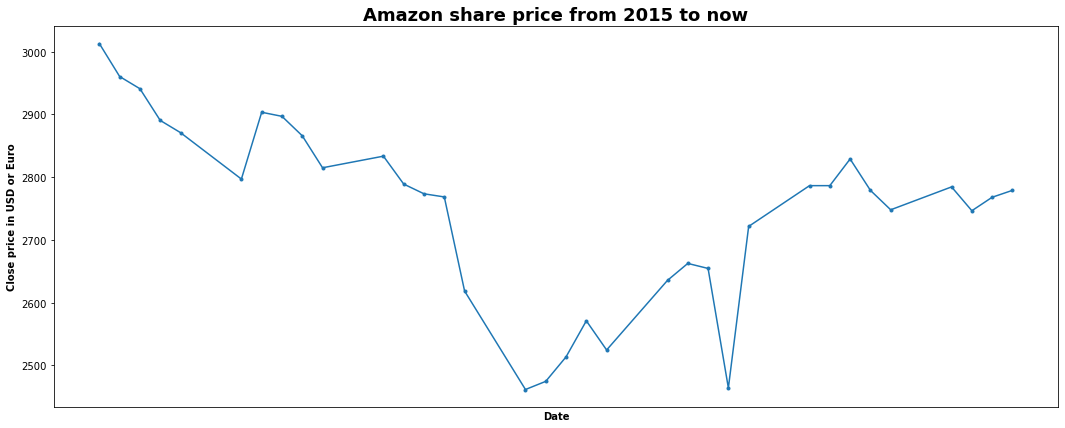

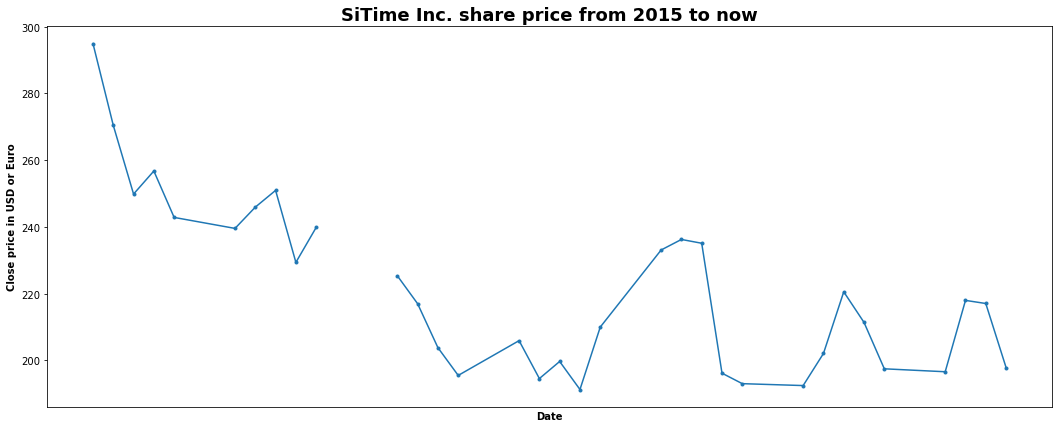

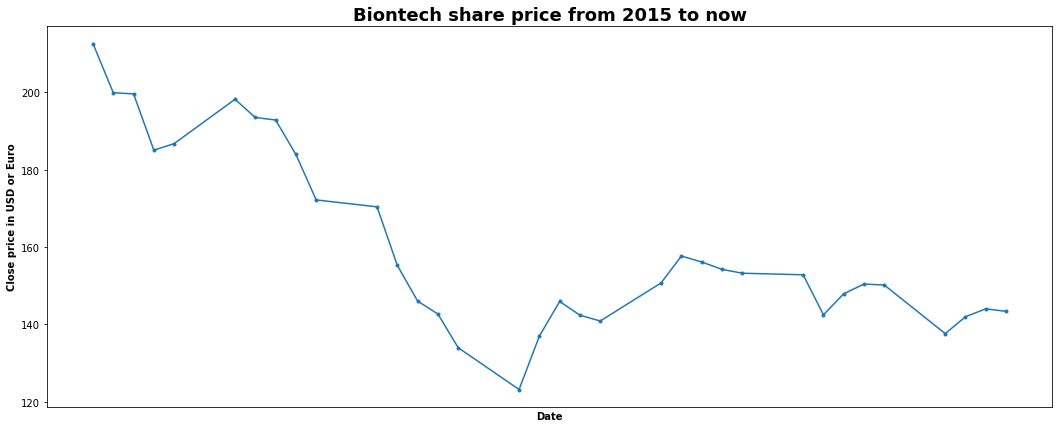

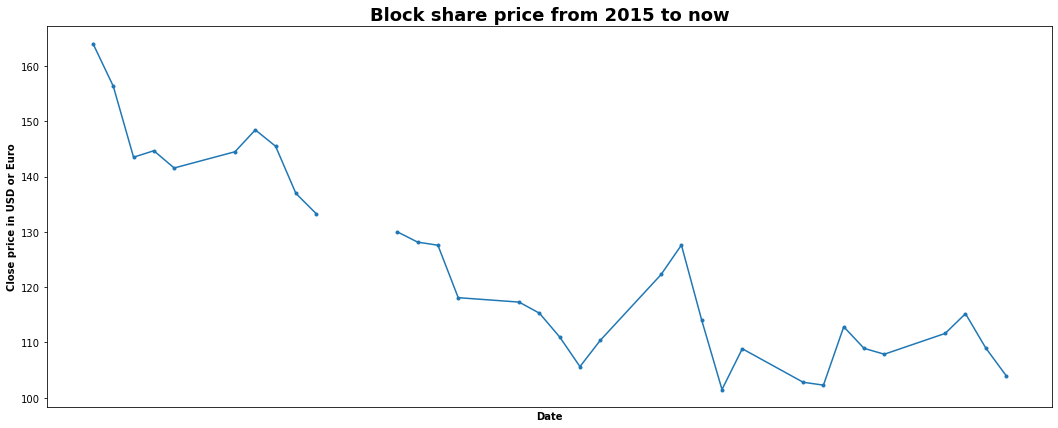

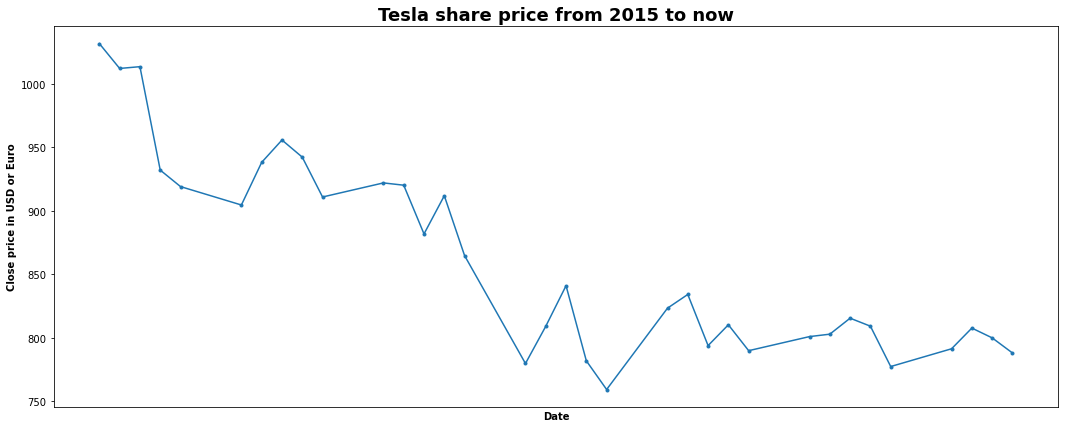

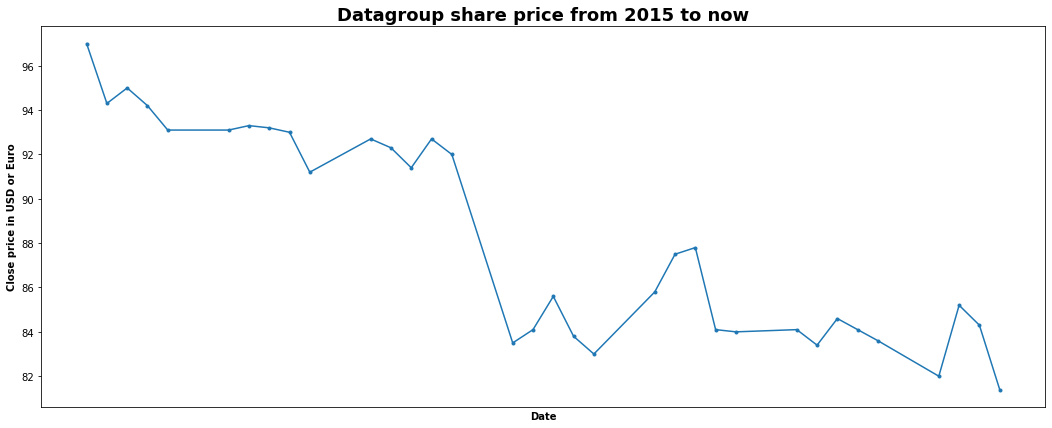

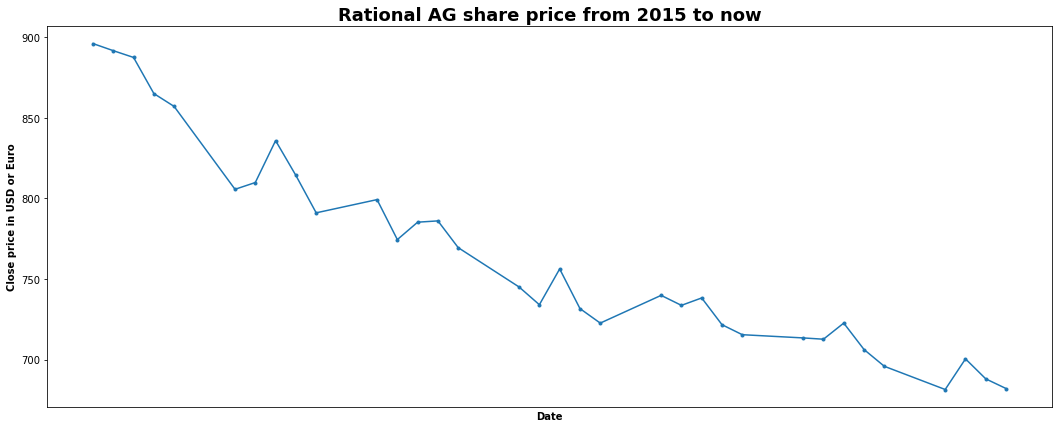

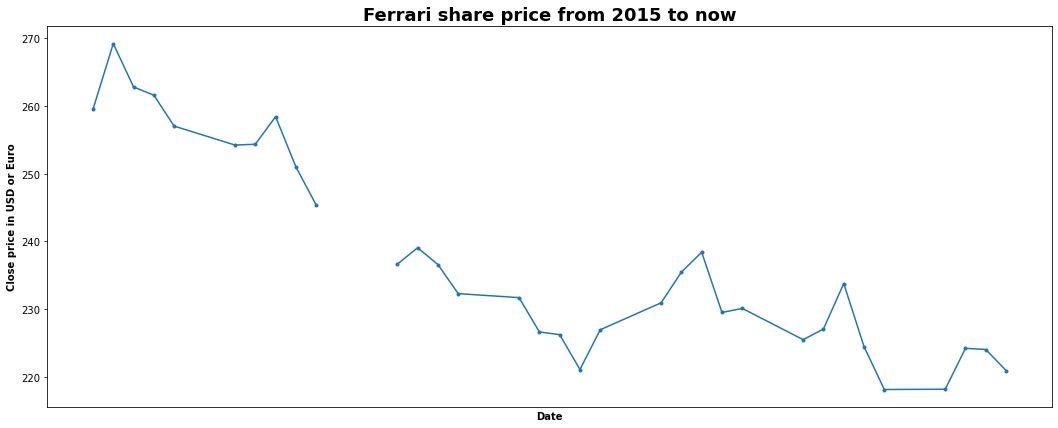

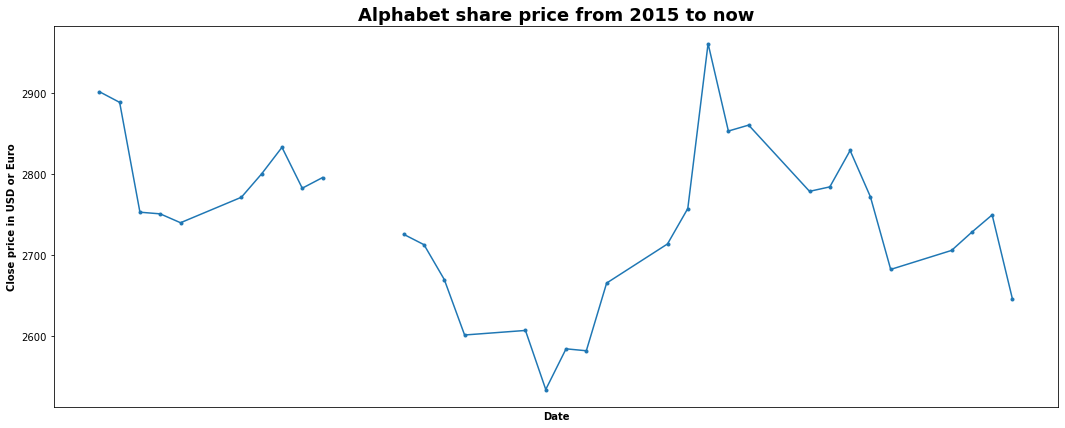

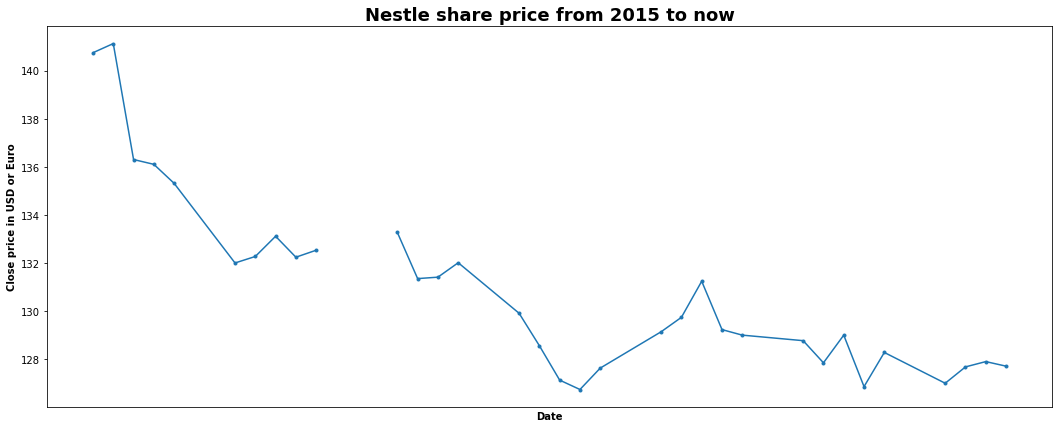

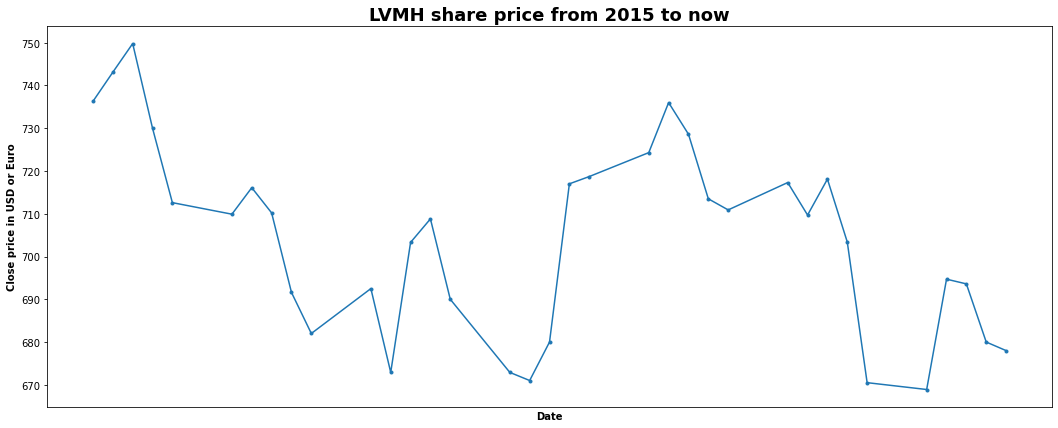

In [9]:
for stock in all_data:
    if (stock != 'Date' and stock != 'Year' and stock != 'Month') :
        plt.figure(figsize=(18,7)).patch.set_facecolor('xkcd:white')
        plt.xticks(all_data.Year[::1])
        plt.title(stock + ' share price from 2015 to now', fontdict={'fontweight': 'bold', 'fontsize': 18})
        plt.xlabel('Date', fontdict={'fontweight': 'bold'})
        plt.ylabel('Close price in USD or Euro', fontdict={'fontweight': 'bold'})
        plt.plot(all_data.Date, all_data[stock], marker ='.', label = stock)
        plt.savefig(f'{stock}', dpi=300)
        
    